# Model Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing required packages

In [4]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
import pickle

# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

In [5]:
# importing dataset
df = pd.read_csv('/content/drive/MyDrive/Machine learning flight price prediction optimized/Dataset/Clean_Dataset.csv')

In [6]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


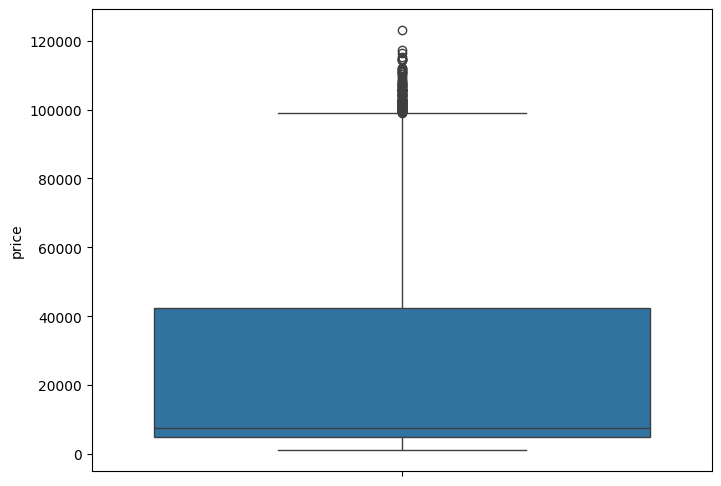

In [8]:
# Box plot of target column
plt.figure(figsize=(8,6))
sns.boxplot(df['price'])
plt.show()

In [9]:
# Removing outliers using IQR
df_n = df.copy()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_n_f = df_n[(df_n['price'] >= lower_bound) & (df_n['price'] <= upper_bound)]


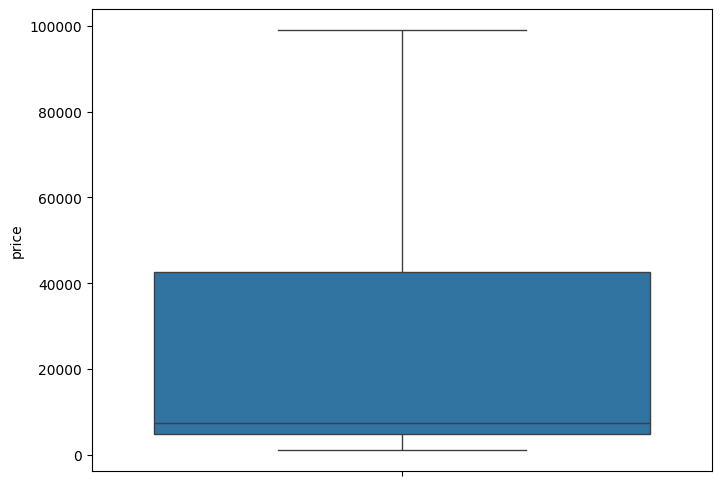

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(df_n_f['price'])
plt.show()

In [11]:
df_n_f.info()
print(type(df_n_f))

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300030 non-null  int64  
 1   airline           300030 non-null  object 
 2   flight            300030 non-null  object 
 3   source_city       300030 non-null  object 
 4   departure_time    300030 non-null  object 
 5   stops             300030 non-null  object 
 6   arrival_time      300030 non-null  object 
 7   destination_city  300030 non-null  object 
 8   class             300030 non-null  object 
 9   duration          300030 non-null  float64
 10  days_left         300030 non-null  int64  
 11  price             300030 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.8+ MB
<class 'pandas.core.frame.DataFrame'>


In [12]:
# Since Cramer's V value of 'flight' and 'airline' field is 1 which shows perfect association, so we can drop any one field
# dropping columns 'Unnamed: 0' and 'flights'
df_n_f.drop(['Unnamed: 0','flight'],axis=1,inplace=True)

<ipython-input-12-a074592557cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_f.drop(['Unnamed: 0','flight'],axis=1,inplace=True)


In [13]:
df_n_f.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [14]:
# # storing the Dependent Variables in X and Independent Variable in Y
X = df_n_f.drop(['price'],axis=1)

In [15]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300030 non-null  object 
 1   source_city       300030 non-null  object 
 2   departure_time    300030 non-null  object 
 3   stops             300030 non-null  object 
 4   arrival_time      300030 non-null  object 
 5   destination_city  300030 non-null  object 
 6   class             300030 non-null  object 
 7   duration          300030 non-null  float64
 8   days_left         300030 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 22.9+ MB


In [17]:
X.shape

(300030, 9)

In [18]:
y = df_n_f['price']

In [19]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [20]:
print("Categories in 'airline' variable:     ",end=" " )
print(df['airline'].unique())

print("Categories in 'source_city' variable:  ",end=" ")
print(df['source_city'].unique())

print("Categories in'departure_time' variable:",end=" " )
print(df['departure_time'].unique())

print("Categories in 'stops' variable:     ",end=" " )
print(df['stops'].unique())

print("Categories in 'arrival_time' variable:     ",end=" " )
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable:     ",end=" " )
print(df['destination_city'].unique())

print("Categories in 'class' variable:     ",end=" " )
print(df['class'].unique())

Categories in 'airline' variable:      ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable:   ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in'departure_time' variable: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable:      ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable:      ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable:      ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable:      ['Economy' 'Business']


Creating preprocessor function

In [21]:
def create_preprocessor(X):
    # Define numerical and categorical features
    num_features = X.select_dtypes(exclude="object").columns
    cat_features_ohe = X.select_dtypes(include="object").columns.difference(['stops'])
    cat_stops = ['stops']  # Ensure it's a list

    # Create transformers
    numerical_transformer = StandardScaler()
    categorical_transformer_ohe = OneHotEncoder(sparse_output=False)  # Use dense output
    categorical_transformer_le = OrdinalEncoder()

    # Create ColumnTransformer with specified transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', numerical_transformer, num_features),
            ('onehot', categorical_transformer_ohe, cat_features_ohe),
            ('ordinal', categorical_transformer_le, cat_stops)
        ],
        remainder='passthrough'  # Preserve other columns
    )

    return preprocessor


In [22]:
preprocessor = create_preprocessor(X)

In [23]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 Index(['duration', 'days_left'], dtype='object')),
                                ('onehot', OneHotEncoder(sparse_output=False),
                                 Index(['airline', 'arrival_time', 'class', 'departure_time',
       'destination_city', 'source_city'],
      dtype='object')),
                                ('ordinal', OrdinalEncoder(), ['stops'])])

**Apply Transformation**

In [24]:
def apply_transformations(preprocessor, X):
    # Apply transformations
    X_transformed = preprocessor.fit_transform(X)

    # Get feature names after transformation
    ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(
        X.select_dtypes(include="object").columns.difference(['stops'])
    )
    ordinal_feature_names = [f'{col}_ordinal' for col in ['stops']]  # Rename ordinal features if needed
    num_features = X.select_dtypes(exclude="object").columns
    all_feature_names = num_features.tolist() + ohe_feature_names.tolist() + ordinal_feature_names

    # Convert transformed X to a DataFrame
    X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

    return X_transformed_df


In [25]:
X_transformed_df = apply_transformations(preprocessor, X)

X_transformed_df

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,arrival_time_Afternoon,arrival_time_Early_Morning,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,stops_ordinal
0,-1.397306,-1.844835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,-1.375060,-1.844835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,-1.397306,-1.844835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,-1.386183,-1.844835,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,-1.375060,-1.844835,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300025,-0.297550,1.695548,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
300026,-0.250278,1.695548,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
300027,0.223827,1.695548,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
300028,-0.308672,1.695548,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_transformed_df.columns
print(X_transformed_df.shape)

(300030, 35)


**Correlation maxtrix for feature selection**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_and_filter(preprocessor, X_transformed_df, y, corr_threshold=0.1):
    """
    This function adds the target variable to the transformed DataFrame,
    computes and visualizes the correlation matrix, and filters features
    based on their correlation with the target variable.

    Parameters:
    - preprocessor: The preprocessor used to transform the input data (not used in this function).
    - X_transformed_df: DataFrame containing the transformed features.
    - y: Series or DataFrame containing the target variable.
    - corr_threshold: Threshold for filtering features based on correlation with the target variable.

    Returns:
    - X_filtered: DataFrame with features that have a high correlation with the target variable.
    - high_corr_features.index: Index of features that have high correlation with the target variable.
    """

    # Add target variable to DataFrame
    X_transformed_df['price'] = y

    # Compute the correlation matrix
    corr_matrix = X_transformed_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.5)
    plt.title('Correlation Matrix')
    plt.show()

    # Compute correlation with the target variable
    target_corr = corr_matrix['price'].sort_values(ascending=False)

    # Filter features with high correlation to the target variable
    high_corr_features = target_corr[abs(target_corr) > corr_threshold]

    print("High correlation features with target variable:")
    for feature, corr_value in high_corr_features.items():
        print(f"{feature}: {corr_value:.2f}")

    # Extract the filtered features and target variable
    X_filtered = X_transformed_df[high_corr_features.index].copy()

    # Drop the target variable column if it's in the filtered DataFrame
    if 'price' in X_filtered.columns:
        X_filtered = X_filtered.drop(columns=['price'])

    return X_filtered, high_corr_features


## Model Training and evaluation

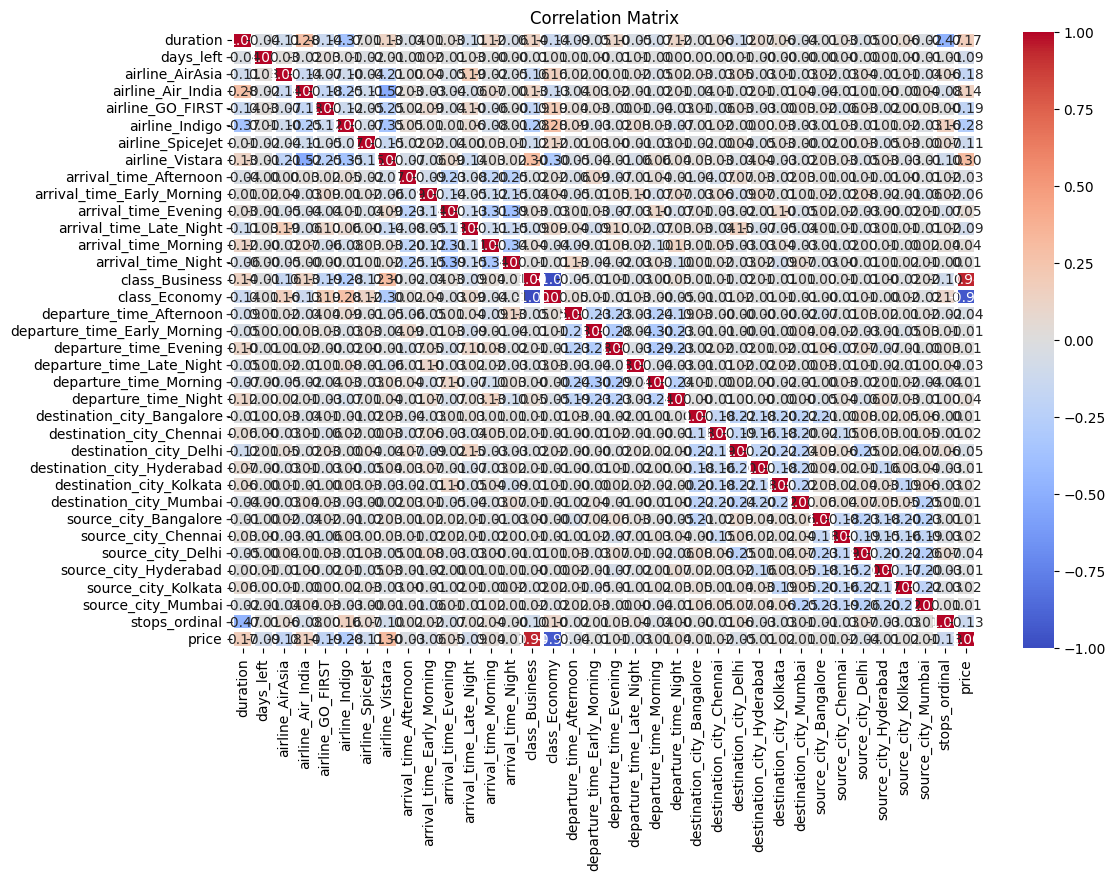

High correlation features with target variable:
price: 1.00
class_Business: 0.94
airline_Vistara: 0.30
duration: 0.17
airline_Air_India: 0.14
arrival_time_Evening: 0.05
destination_city_Delhi: -0.05
arrival_time_Early_Morning: -0.06
days_left: -0.09
arrival_time_Late_Night: -0.09
airline_SpiceJet: -0.11
stops_ordinal: -0.13
airline_AirAsia: -0.18
airline_GO_FIRST: -0.19
airline_Indigo: -0.28
class_Economy: -0.94


,class_Business,airline_Vistara,duration,airline_Air_India,arrival_time_Evening,destination_city_Delhi,arrival_time_Early_Morning,days_left,arrival_time_Late_Night,airline_SpiceJet,stops_ordinal,airline_AirAsia,airline_GO_FIRST,airline_Indigo,class_Economy
0,0.0,0.0,-1.397306,0.0,0.0,0.0,0.0,-1.844835,0.0,1.0,2.0,0.0,0.0,0.0,1.0
1,0.0,0.0,-1.375060,0.0,0.0,0.0,0.0,-1.844835,0.0,1.0,2.0,0.0,0.0,0.0,1.0
2,0.0,0.0,-1.397306,0.0,0.0,0.0,1.0,-1.844835,0.0,0.0,2.0,1.0,0.0,0.0,1.0
3,0.0,1.0,-1.386183,0.0,0.0,0.0,0.0,-1.844835,0.0,0.0,2.0,0.0,0.0,0.0,1.0
4,0.0,1.0,-1.375060,0.0,0.0,0.0,0.0,-1.844835,0.0,0.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300025,1.0,1.0,-0.297550,0.0,1.0,0.0,0.0,1.695548,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300026,1.0,1.0,-0.250278,0.0,0.0,0.0,0.0,1.695548,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300027,1.0,1.0,0.223827,0.0,0.0,0.0,0.0,1.695548,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300028,1.0,1.0,-0.308672,0.0,1.0,0.0,0.0,1.695548,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_filtered,high_corr_features = preprocess_and_filter(preprocessor, X_transformed_df, y,corr_threshold=0.05)
X_filtered

In [29]:
high_corr_features.index

Index(['price', 'class_Business', 'airline_Vistara', 'duration',
       'airline_Air_India', 'arrival_time_Evening', 'destination_city_Delhi',
       'arrival_time_Early_Morning', 'days_left', 'arrival_time_Late_Night',
       'airline_SpiceJet', 'stops_ordinal', 'airline_AirAsia',
       'airline_GO_FIRST', 'airline_Indigo', 'class_Economy'],
      dtype='object')

In [30]:
# Splitting the Data into Training set and Testing Set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_filtered,y,test_size=0.30,random_state=42)

print('shape of X_train : {}'.format(X_train.shape))
print('shape of X_test : {}'.format(X_test.shape))
print('shape of y_train : {}'.format(y_train.shape))
print('shape of y_test : {}'.format(y_test.shape))

shape of X_train : (210021, 15)
shape of X_test : (90009, 15)
shape of y_train : (210021,)
shape of y_test : (90009,)


In [31]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_scr = r2_score(true,predicted)
    return mse,mae,rmse,r2_scr

### Linear Regression

In [33]:
LR = LinearRegression()
LR.fit(X_train,y_train)

y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR = LR.predict(X_test)



model_train_mse_LR, model_train_mae_LR, model_train_rmse_LR, model_train_r2_LR = evaluate_model(y_train,y_train_pred_LR)
model_test_mse_LR, model_test_mae_LR, model_test_rmse_LR, model_test_r2_LR = evaluate_model(y_test, y_test_pred_LR)

print('Model performance for Training set')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_LR))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_LR))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_LR))
print("- R2 Score: {:.4f}".format(model_train_r2_LR))

print('----------------------------------')

print('Model performance for Test set')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_LR))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_LR))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_LR))
print("- R2 Score: {:.4f}".format(model_test_r2_LR))

print(y_train_pred_LR[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_LR[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values


Model performance for Training set
- Mean Squared Error: 47890335.8643
- Root Mean Squared Error: 6920.2844
- Mean Absolute Error: 4626.5444
- R2 Score: 0.9067
----------------------------------
Model performance for Test set
- Mean Squared Error: 47475927.8192
- Root Mean Squared Error: 6890.2778
- Mean Absolute Error: 4604.7699
- R2 Score: 0.9070
[53824. 11054. 57344.  6782. 11074.]
246542    57081
35475     13116
222083    72776
74989      3282
55949      7135
Name: price, dtype: int64
[8678. 5262. 9294. 4614. 5790.]
199729    5042
139746    6109
54736     5103
9515      5087
18040     4007
Name: price, dtype: int64


In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/linear_reg_model.pkl','wb') as file:
    pickle.dump(LR,file)

## Applying Reularization techniques

### L2 Regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Ridge regression model
ridge = Ridge()

# Define the parameter grid
param_dist = {
    'alpha': np.logspace(-4, 1, 50)  # alpha values from 0.0001 to 10 in a log scale
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with best parameters
best_ridge = random_search.best_estimator_

# Make predictions
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

# Evaluate the model
model_train_mse_ridge, model_train_mae_ridge, model_train_rmse_ridge, model_train_r2_ridge = evaluate_model(y_train, y_train_pred_ridge)
model_test_mse_ridge, model_test_mae_ridge, model_test_rmse_ridge, model_test_r2_ridge = evaluate_model(y_test, y_test_pred_ridge)

print('Model performance for Training set with best Ridge model')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_ridge))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_ridge))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_ridge))
print("- R2 Score: {:.4f}".format(model_train_r2_ridge))

print('----------------------------------')

print('Model performance for Test set with best Ridge model')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_ridge))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_ridge))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_ridge))
print("- R2 Score: {:.4f}".format(model_test_r2_ridge))

print(y_train_pred_LR[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_LR[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'alpha': 0.7543120063354622}
Model performance for Training set with best Ridge model
- Mean Squared Error: 47890688.2982
- Root Mean Squared Error: 6920.3098
- Mean Absolute Error: 4625.7219
- R2 Score: 0.9067
----------------------------------
Model performance for Test set with best Ridge model
- Mean Squared Error: 47476400.7517
- Root Mean Squared Error: 6890.3121
- Mean Absolute Error: 4603.9507
- R2 Score: 0.9070
[53824. 11054. 57344.  6782. 11074.]
246542    57081
35475     13116
222083    72776
74989      3282
55949      7135
Name: price, dtype: int64
[8678. 5262. 9294. 4614. 5790.]
199729    5042
139746    6109
54736     5103
9515      5087
18040     4007
Name: price, dtype: int64


In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/ridge_reg_model.pkl','wb') as file:
    pickle.dump(ridge,file)

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import uniform

# Define the Elastic Net model
elastic_net = ElasticNet()

# Define the parameter grid
param_dist = {
    'alpha': np.logspace(-4, 1, 50),  # Alpha values from 0.0001 to 10 in a log scale
    'l1_ratio': uniform(loc=0, scale=1)  # Ratio of L1 to L2 regularization
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(elastic_net, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with best parameters
best_elastic_net = random_search.best_estimator_

# Make predictions
y_train_pred_elastic_net = best_elastic_net.predict(X_train)
y_test_pred_elastic_net = best_elastic_net.predict(X_test)

# Evaluate the model
model_train_mse_elastic_net, model_train_mae_elastic_net, model_train_rmse_elastic_net, model_train_r2_elastic_net = evaluate_model(y_train, y_train_pred_elastic_net)
model_test_mse_elastic_net, model_test_mae_elastic_net, model_test_rmse_elastic_net, model_test_r2_elastic_net = evaluate_model(y_test, y_test_pred_elastic_net)

print('Model performance for Training set with best Elastic Net model')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_elastic_net))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_elastic_net))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_elastic_net))
print("- R2 Score: {:.4f}".format(model_train_r2_elastic_net))

print('----------------------------------')

print('Model performance for Test set with best Elastic Net model')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_elastic_net))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_elastic_net))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_elastic_net))
print("- R2 Score: {:.4f}".format(model_test_r2_elastic_net))

print(y_train_pred_LR[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_LR[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.697e+12, tolerance: 8.622e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.704e+12, tolerance: 8.629e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.679e+12, tolerance: 8.604e

Best parameters found:  {'alpha': 0.00015998587196060574, 'l1_ratio': 0.8599404067363206}
Model performance for Training set with best Elastic Net model
- Mean Squared Error: 47890689.6651
- Root Mean Squared Error: 6920.3099
- Mean Absolute Error: 4625.6954
- R2 Score: 0.9067
----------------------------------
Model performance for Test set with best Elastic Net model
- Mean Squared Error: 47476406.4706
- Root Mean Squared Error: 6890.3125
- Mean Absolute Error: 4603.9249
- R2 Score: 0.9070
[53824. 11054. 57344.  6782. 11074.]
246542    57081
35475     13116
222083    72776
74989      3282
55949      7135
Name: price, dtype: int64
[8678. 5262. 9294. 4614. 5790.]
199729    5042
139746    6109
54736     5103
9515      5087
18040     4007
Name: price, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.032e+12, tolerance: 1.078e+10
  model = cd_fast.enet_coordinate_descent(


### Insight: Best parameters found:  {'alpha': 0.00015998587196060574, 'l1_ratio': 0.8599404067363206}

In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/elastic_net_model.pkl','wb') as file:
    pickle.dump(best_elastic_net,file)

### K-Nearest Neighbor Regressor

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define the KNN Regressor model
knn = KNeighborsRegressor()

# Define the parameter grid for HalvingGridSearchCV
param_grid = {
    'n_neighbors': [5,6,7],  # List of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'p': [1,2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Setup the HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    knn,
    param_grid=param_grid,
    factor=2,  # Factor by which to decrease the number of candidates
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Best parameters from HalvingGridSearchCV
best_params = halving_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with best parameters
best_knn = halving_search.best_estimator_

# Make predictions
y_train_pred_knn = best_knn.predict(X_train)
y_test_pred_knn = best_knn.predict(X_test)

# Evaluate the model
model_train_mse_knn, model_train_mae_knn, model_train_rmse_knn, model_train_r2_knn = evaluate_model(y_train, y_train_pred_knn)
model_test_mse_knn, model_test_mae_knn, model_test_rmse_knn, model_test_r2_knn = evaluate_model(y_test, y_test_pred_knn)

print('Model performance for Training set with best KNN model after RFE')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_knn))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_knn))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_knn))
print("- R2 Score: {:.4f}".format(model_train_r2_knn))

print('----------------------------------')

print('Model performance for Test set with best KNN model after RFE')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_knn))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_knn))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_knn))
print("- R2 Score: {:.4f}".format(model_test_r2_knn))

print(y_train_pred_knn[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_knn[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 52505
max_resources_: 210021
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 6
n_resources: 52505
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 1
n_candidates: 3
n_resources: 105010
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 210020
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Model performance for Training set with best KNN model after RFE
- Mean Squared Error: 20760743.2880
- Root Mean Squared Error: 4556.3959
- Mean Absolute Error: 2628.2562
- R2 Score: 0.9596
----------------------------------
Model performance for Test set with best KNN model after RFE
- Mean Squared Error: 27579801.3493
- Root Mean Squared Error: 5251.6475
- Mean Absolute Error: 3025.5290
- R2 Score: 0.9459
[57420.28571429 11272

**Insight : Best parameters found:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}**

In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/knn_model.pkl','wb') as file:
    pickle.dump(best_knn,file)

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 1640
max_resources_: 210021
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 144
n_resources: 1640
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

----------
iter: 1
n_candidates: 72
n_resources: 3280
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 2
n_candidates: 36
n_resources: 6560
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 3
n_candidates: 18
n_resources: 13120
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 4
n_candidates: 9
n_resources: 26240
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 5
n_candidates: 5
n_resources: 52480
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 6
n_candidates: 3
n_resources: 104960
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

----------
iter: 7
n_candidates: 2
n_resources: 209920
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [-54638922.64805093 -48214005.90553455 -40843284.87886177
 -45558982.78983693 -44458199.09497293 -39216340.5658815
 -38834515.08126225 -38834515.08126225 -38369701.03781592
                nan                nan                nan
                nan                nan                nan
                nan                nan                nan
 -60790088.97592815 -60822759.86685406 -48834884.56976663
 -50052391.85137091 -50493412.90661971 -46117364.93437068
 -45477839.79893903 -48121227.57670812 -45196375.34808983
 -54119234.35983815 -58591502.04757953 -44748723.34495925
 -55528451.22709367 -51675837.86311926 -66716692.56574194
 -53063321.16654534 -41072157.65193336 -49517882.69029975
 -42998052.21283842 -41799761.65537111 -37444299.12983559
 -40439837.59925716 -39323527.23964606 -37068775.84120011
 -36432510.5948249  -36449432.73281419 -36117392.

Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Model performance for Training set with best Decision Tree model
- Mean Squared Error: 25164326.8740
- Root Mean Squared Error: 5016.4058
- Mean Absolute Error: 2883.2024
- R2 Score: 0.9510
----------------------------------
Model performance for Test set with best Decision Tree model
- Mean Squared Error: 25397518.4103
- Root Mean Squared Error: 5039.5951
- Mean Absolute Error: 2894.2701
- R2 Score: 0.9502
[57420.28571429 11272.71428571 76709.28571429  4287.42857143
  6320.42857143]
246542    57081
35475     13116
222083    72776
74989      3282
55949      7135
Name: price, dtype: int64
[4964.14285714 5763.         9756.71428571 5195.14285714 3280.85714286]
199729    5042
139746    6109
54736     5103
9515      5087
18040     4007
Name: price, dtype: int64


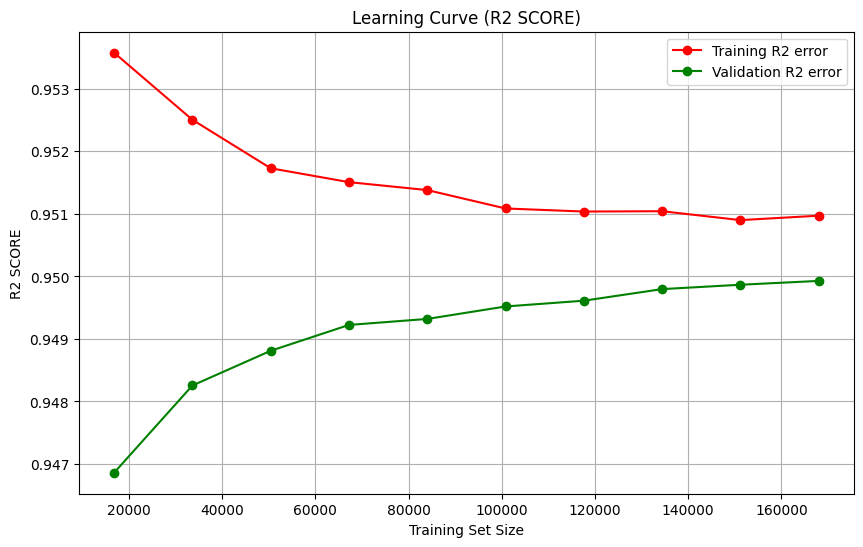

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import learning_curve


# Define the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Define the parameter grid for HalvingGridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Setup the HalvingGridSearchCV
halving_search = HalvingGridSearchCV(
    dt_regressor,
    param_grid=param_grid,
    factor=2,  # Factor by which to decrease the number of candidates
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit HalvingGridSearchCV on the training data
halving_search.fit(X_train, y_train)

# Best parameters from HalvingGridSearchCV
best_params = halving_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with best parameters
best_dt = halving_search.best_estimator_

# Make predictions
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

# Define a function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Evaluate the model
model_train_mse_dt, model_train_mae_dt, model_train_rmse_dt, model_train_r2_dt = evaluate_model(y_train, y_train_pred_dt)
model_test_mse_dt, model_test_mae_dt, model_test_rmse_dt, model_test_r2_dt = evaluate_model(y_test, y_test_pred_dt)

print('Model performance for Training set with best Decision Tree model')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_dt))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_dt))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_dt))
print("- R2 Score: {:.4f}".format(model_train_r2_dt))

print('----------------------------------')

print('Model performance for Test set with best Decision Tree model')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_dt))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_dt))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_dt))
print("- R2 Score: {:.4f}".format(model_test_r2_dt))

print(y_train_pred_knn[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_knn[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values

# Define the function to plot learning curve
def plot_learning_curve_r2(estimator, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='r2', n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Convert negative MSE to positive
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean =  np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training R2 error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation R2 error')

    plt.title('Learning Curve (R2 SCORE)')
    plt.xlabel('Training Set Size')
    plt.ylabel('R2 SCORE')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve for the best Decision Tree model
plot_learning_curve_r2(best_dt, X_train, y_train)


In [ ]:
print("Best parameters found: ", best_params)
print('Model performance for Training set with best Decision Tree model')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_dt))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_dt))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_dt))
print("- R2 Score: {:.4f}".format(model_train_r2_dt))

print('----------------------------------')

print('Model performance for Test set with best Decision Tree model')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_dt))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_dt))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_dt))
print("- R2 Score: {:.4f}".format(model_test_r2_dt))

Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Model performance for Training set with best Decision Tree model
- Mean Squared Error: 25164326.8740
- Root Mean Squared Error: 5016.4058
- Mean Absolute Error: 2883.2024
- R2 Score: 0.9510
----------------------------------
Model performance for Test set with best Decision Tree model
- Mean Squared Error: 25397518.4103
- Root Mean Squared Error: 5039.5951
- Mean Absolute Error: 2894.2701
- R2 Score: 0.9502


In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/decisiontree_model.pkl','wb') as file:
    pickle.dump(best_dt,file)

In [ ]:
### Bagging Regressor

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}
Model performance for Training set with best Bagging Regressor model
- Mean Squared Error: 12364005.0166
- Root Mean Squared Error: 3516.2487
- Mean Absolute Error: 1854.0211
- R2 Score: 0.9759
----------------------------------
Model performance for Test set with best Bagging Regressor model
- Mean Squared Error: 22357324.2445
- Root Mean Squared Error: 4728.3532
- Mean Absolute Error: 2562.6316
- R2 Score: 0.9562
[57420.28571429 11272.71428571 76709.28571429  4287.42857143
  6320.42857143]
246542    57081
35475     13116
222083    72776
74989      3282
55949      7135
Name: price, dtype: int64
[4964.14285714 5763.         9756.71428571 5195.14285714 3280.85714286]
199729    5042
139746    6109
54736     5103
9515      5087
18040     4007
Name: price, dtype: int64


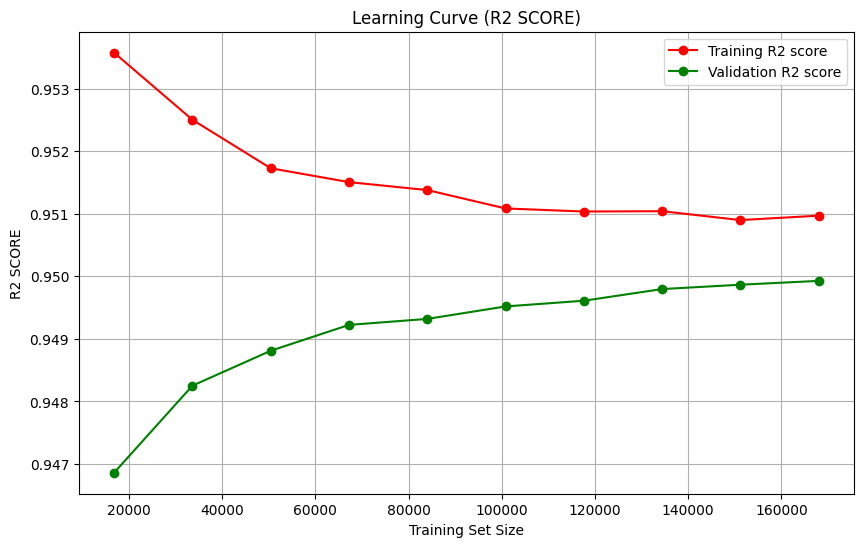

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_dt = DecisionTreeRegressor()

# Define the Bagging Regressor model with the base estimator
bagging_regressor = BaggingRegressor(base_estimator=base_dt, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10,20,30],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.7, 1.0],  # Fraction of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.7, 1.0],  # Fraction of features to draw from X to train each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]  # Whether features are drawn with replacement
}

# Setup the GridSearchCV
grid_search_bagging = GridSearchCV(
    bagging_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search_bagging.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params_bagging = grid_search_bagging.best_params_
print("Best parameters found: ", best_params_bagging)

# Train the model with best parameters
best_bagging = grid_search_bagging.best_estimator_

# Make predictions
y_train_pred_bagging = best_bagging.predict(X_train)
y_test_pred_bagging = best_bagging.predict(X_test)

# Evaluate the model
model_train_mse_bagging, model_train_mae_bagging, model_train_rmse_bagging, model_train_r2_bagging = evaluate_model(y_train, y_train_pred_bagging)
model_test_mse_bagging, model_test_mae_bagging, model_test_rmse_bagging, model_test_r2_bagging = evaluate_model(y_test, y_test_pred_bagging)

print('Model performance for Training set with best Bagging Regressor model')
print("- Mean Squared Error: {:.4f}".format(model_train_mse_bagging))
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_bagging))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_bagging))
print("- R2 Score: {:.4f}".format(model_train_r2_bagging))

print('----------------------------------')

print('Model performance for Test set with best Bagging Regressor model')
print("- Mean Squared Error: {:.4f}".format(model_test_mse_bagging))
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_bagging))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_bagging))
print("- R2 Score: {:.4f}".format(model_test_r2_bagging))

print(y_train_pred_knn[:5])  # Print first 5 predictions
print(y_train[:5])           # Print first 5 actual values

print(y_test_pred_knn[:5])    # Print first 5 test predictions
print(y_test[:5])            # Print first 5 actual test values

# Define the function to plot learning curve
def plot_learning_curve_r2(estimator, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='r2', n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Convert negative MSE to positive
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean =  np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training R2 score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation R2 score')

    plt.title('Learning Curve (R2 SCORE)')
    plt.xlabel('Training Set Size')
    plt.ylabel('R2 SCORE')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve for the best Decision Tree model
plot_learning_curve_r2(best_dt, X_train, y_train)




In [ ]:
# saving model as pickle file
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/bagging_reg_model.pkl','wb') as file:
    pickle.dump(best_bagging,file)

## Predicting any Random scenerio

In [ ]:
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/bagging_reg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


CUSTOM DATA PREDICTION

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

def preprocess_and_save_model(X, y, corr_threshold=0.1, model_path='preprocessor_filtered_model.pkl'):
    """
    Preprocess the data, filter based on correlation with the target, and save the model as a pickle file.

    Parameters:
    - X: DataFrame containing the input features.
    - y: Series or DataFrame containing the target variable.
    - corr_threshold: Threshold for filtering features based on correlation with the target variable.
    - model_path: File path to save the preprocessor and filtered model as a pickle file.

    Returns:
    - X_filtered: DataFrame containing the features that have a high correlation with the target variable.
    - high_corr_features: List of features with high correlation with the target variable.
    """

    # Step 1: Define the preprocessor
    def create_preprocessor(X):
        num_features = X.select_dtypes(exclude="object").columns
        cat_features_ohe = X.select_dtypes(include="object").columns.difference(['stops'])
        cat_stops = ['stops']

        numerical_transformer = StandardScaler()
        categorical_transformer_ohe = OneHotEncoder(sparse_output=False)
        categorical_transformer_le = OrdinalEncoder()

        preprocessor = ColumnTransformer(
            transformers=[
                ('scaler', numerical_transformer, num_features),
                ('onehot', categorical_transformer_ohe, cat_features_ohe),
                ('ordinal', categorical_transformer_le, cat_stops)
            ],
            remainder='passthrough'
        )
        return preprocessor

    # Step 2: Apply transformations
    def apply_transformations(preprocessor, X):
        X_transformed = preprocessor.fit_transform(X)

        ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(
            X.select_dtypes(include="object").columns.difference(['stops'])
        )
        ordinal_feature_names = [f'{col}_ordinal' for col in ['stops']]
        num_features = X.select_dtypes(exclude="object").columns
        all_feature_names = num_features.tolist() + ohe_feature_names.tolist() + ordinal_feature_names

        X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)
        return X_transformed_df

    # Step 3: Preprocess and filter the data
    def preprocess_and_filter(preprocessor, X_transformed_df, y, corr_threshold=0.1):
        X_transformed_df['price'] = y
        corr_matrix = X_transformed_df.corr()

        target_corr = corr_matrix['price'].sort_values(ascending=False)
        high_corr_features = target_corr[abs(target_corr) > corr_threshold]

        X_filtered = X_transformed_df[high_corr_features.index].copy()

        if 'price' in X_filtered.columns:
            X_filtered = X_filtered.drop(columns=['price'])

        return X_filtered, high_corr_features

    # Step 4: Create and apply the preprocessor
    preprocessor = create_preprocessor(X)
    X_transformed_df = apply_transformations(preprocessor, X)

    # Step 5: Filter the features and get X_filtered
    X_filtered, high_corr_features = preprocess_and_filter(preprocessor, X_transformed_df, y, corr_threshold)

    # Step 6: Save the preprocessor and filtered data model as a pickle file
    with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/preprocessing.pkl', 'wb') as file:
        pickle.dump({
            'preprocessor': preprocessor,
            'X_filtered': X_filtered,
            'high_corr_features': high_corr_features
        }, file)

    return X_filtered, high_corr_features


# Example usage
# Assuming X is the feature DataFrame and y is the target variable (price)

X_filtered, high_corr_features = preprocess_and_save_model(X, y, corr_threshold=0.05, model_path='/content/preprocessor_filtered_model.pkl')


In [ ]:
import pickle
import pandas as pd

# Load the saved preprocessor and filtered model
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/preprocessing.pkl', 'rb') as file:
    model_data = pickle.load(file)

# Extract the preprocessor and high-correlation features from the saved file
preprocessor = model_data['preprocessor']
high_corr_features = model_data['high_corr_features'].index.tolist()

# Remove 'price' from high_corr_features if it exists
high_corr_features = [feature for feature in high_corr_features if feature != 'price']

# Define the custom input as a dictionary
user_input = {
    'airline': 'Indigo',
    'source_city': 'Delhi',
    'departure_time': 'Morning',
    'stops': 'one',
    'arrival_time': 'Afternoon',
    'destination_city': 'Mumbai',
    'class': 'Economy',
    'duration': 6.0,
    'days_left': 21
}

# Step 1: Convert user input to a DataFrame
input_data = pd.DataFrame([user_input])

# Step 2: Apply the preprocessor to transform the input data
input_transformed = preprocessor.transform(input_data)

# Step 3: Get feature names from the preprocessor
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(
    input_data.select_dtypes(include="object").columns.difference(['stops'])
)
ordinal_feature_names = [f'{col}_ordinal' for col in ['stops']]
num_features = input_data.select_dtypes(exclude="object").columns
all_feature_names = num_features.tolist() + ohe_feature_names.tolist() + ordinal_feature_names

# Step 4: Convert the transformed input to a DataFrame with appropriate column names
input_transformed_df = pd.DataFrame(input_transformed, columns=all_feature_names)

# Step 5: Filter the transformed input to keep only the high-correlation features
X_filtered = input_transformed_df[high_corr_features].copy()

# Display the filtered features
print("Filtered Features (X_filtered):")
print(X_filtered)


Filtered Features (X_filtered):
   class_Business  airline_Vistara  duration  airline_Air_India  \
0             0.0              0.0 -0.864807                0.0   

   arrival_time_Evening  destination_city_Delhi  arrival_time_Early_Morning  \
0                   0.0                     0.0                         0.0   

   days_left  arrival_time_Late_Night  airline_SpiceJet  stops_ordinal  \
0  -0.369676                      0.0               0.0            0.0   

   airline_AirAsia  airline_GO_FIRST  airline_Indigo  class_Economy  
0              0.0               0.0             1.0            1.0  


In [ ]:
# Step 4: Use the loaded model to predict the price
predicted_price = loaded_model.predict(X_filtered)

# Step 5: Output the predicted price
print(f'Predicted Price: {predicted_price}')

Predicted Price: [7513.09166667]


In [ ]:
import pandas as pd
import numpy as np
import pickle

# Load the preprocessor and model
with open('/content/drive/MyDrive/Machine learning flight price prediction optimized/model/preprocessing.pkl', 'rb') as file:
    model_data = pickle.load(file)

preprocessor = model_data['preprocessor']
high_corr_features = model_data['high_corr_features'].index.tolist()

# Remove 'price' from high_corr_features if it exists
high_corr_features = [feature for feature in high_corr_features if feature != 'price']

# Define the custom input
user_input = {
    'source_city': 'Delhi',
    'destination_city': 'Kolkata',
    'class': 'Business',
    'days_left': 5  # Include days_left in the input
}

# Create a DataFrame with fixed user input
fixed_input_df = pd.DataFrame([user_input])

# Prepare for generating combinations
possible_airlines = ['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India']
possible_arrival_times = ['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening', 'Late_Night']
possible_departure_times = ['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night']
possible_stops = ['zero', 'one', 'two_or_more']

# Define the range for 'duration'
duration_range = range(1, 5)

# Generate all possible combinations for the varying features
combinations = pd.DataFrame(
    pd.MultiIndex.from_product(
        [possible_airlines, possible_arrival_times, possible_departure_times, possible_stops, duration_range],
        names=['airline', 'arrival_time', 'departure_time', 'stops', 'duration']
    ).to_list(),
    columns=['airline', 'arrival_time', 'departure_time', 'stops', 'duration']
)

# Add fixed input to the combinations DataFrame
for feature in ['source_city', 'destination_city', 'class', 'days_left']:
    combinations[feature] = user_input[feature]

# Apply preprocessing to the combinations
combinations_transformed = preprocessor.transform(combinations)

# Convert to DataFrame with appropriate column names
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(
    combinations.select_dtypes(include="object").columns.difference(['stops'])
)
ordinal_feature_names = [f'{col}_ordinal' for col in ['stops']]
num_features = combinations.select_dtypes(exclude="object").columns
all_feature_names = num_features.tolist() + ohe_feature_names.tolist() + ordinal_feature_names

combinations_transformed_df = pd.DataFrame(combinations_transformed, columns=all_feature_names)

# Filter the transformed data to keep only the high-correlation features
X_filtered = combinations_transformed_df[high_corr_features].copy()

# Predict the price for each combination
predicted_prices = loaded_model.predict(X_filtered)

# Add the predicted prices to the DataFrame
combinations['predicted_price'] = predicted_prices

# Find the top 5 combinations with the lowest predicted prices
top_5_combinations = combinations.nsmallest(5, 'predicted_price')

# Display the results
print("Top 5 Combinations with Lowest Predicted Prices:")
print(top_5_combinations)


Top 5 Combinations with Lowest Predicted Prices:
        airline arrival_time departure_time        stops  duration  \
2160  Air_India        Night        Evening         zero         1   
2164  Air_India        Night        Evening          one         1   
2168  Air_India        Night        Evening  two_or_more         1   
2172  Air_India        Night  Early_Morning         zero         1   
2176  Air_India        Night  Early_Morning          one         1   

     source_city destination_city     class  days_left  predicted_price  
2160       Delhi          Kolkata  Business          5          12095.0  
2164       Delhi          Kolkata  Business          5          12095.0  
2168       Delhi          Kolkata  Business          5          12095.0  
2172       Delhi          Kolkata  Business          5          12095.0  
2176       Delhi          Kolkata  Business          5          12095.0  
